# Competition Phase 1

- Group: 6

- Your student code: 
+ 21110185
+ 21110356
+ 21110289
+ 21110261

# I. Cài đặt mô hình với tập train

### 1. Cài đặt thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_confusion_matrix

### 2. Tìm hiểu về dữ liệu

In [3]:
data = pd.read_csv("train.csv", sep="|")

### 3. Khám phá tổng quan về dữ liệu

In [4]:
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [5]:
# Loại bỏ các giá trị bị thiếu (NA)
heart_dropna = data.dropna()

In [6]:
print(data.columns)
print(data.head())
data.columns = data.columns.str.strip()  # Loại bỏ dấu cách ở đầu và cuối tên cột


Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')
   trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  \
0           5                    1054       54.70              7   
1           3                     108       27.36              5   
2           3                    1516       62.16              3   
3           6                    1791       92.31              8   
4           5                     430       81.53              3   

   scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  \
0                         0                      3                   0.027514   
1                         2                      4                   0.129630   
2                        10                      5                   0.008575   
3       

In [7]:
# Chia dữ liệu thành features và target
X = data.drop(columns=['fraud'])
y = data['fraud']

In [8]:
# Chuyển các biến categorical sang dạng one-hot
oh_X = pd.get_dummies(X, drop_first = True)

In [9]:
oh_X.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111


In [10]:
oh_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 132.2 KB


### 4. Chia dữ liệu
Ta chia tỉ lệ tập train và tập test là 70/30

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    oh_X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 1879
Labels counts in y_train: 1315
Labels counts in y_test: 564


### 5. Tạo một Random Forest với sklearn

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### 5.1. Độ đo

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tính toán các độ đo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In các độ đo
print("Accuracy on test set:", accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)
print("F1 score on test set:", f1)


Accuracy on test set: 0.9698581560283688
Precision on test set: 0.9090909090909091
Recall on test set: 0.5714285714285714
F1 score on test set: 0.7017543859649122


### 6. Vẽ sơ đồ Confusion Matrix

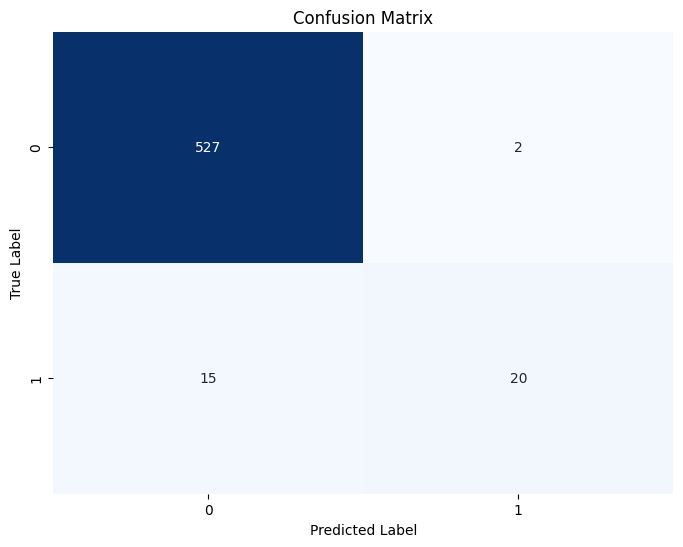

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán nhãn của dữ liệu validation
y_pred = model.predict(X_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dự đoán:
- 527 người: Dự đoán không gian lận là đúng 
- 2   người: Dự đoán gian lận, thực chất là không gian lận
- 15  người: Dự đoán không gian lận, thực chất là gian lận
- 20  người: Dự đoán gian lận là đúng

# SỬ DỤNG MÔ HÌNH LOGISTIC REGRESSTION

Precision: [0.06205674 0.06216696 0.06227758 0.06238859 0.0625     0.06261181
 0.06272401 0.06283662 0.06294964 0.06306306 0.0631769  0.06329114
 0.0634058  0.06352087 0.06363636 0.06375228 0.06386861 0.06398537
 0.06410256 0.06422018 0.06433824 0.06445672 0.06457565 0.06469501
 0.06481481 0.06493506 0.06505576 0.06517691 0.06529851 0.06542056
 0.06554307 0.06566604 0.06578947 0.06591337 0.06603774 0.06616257
 0.06628788 0.06641366 0.06653992 0.06666667 0.06679389 0.06692161
 0.06704981 0.0671785  0.06730769 0.06743738 0.06756757 0.06769826
 0.06782946 0.06796117 0.06809339 0.06822612 0.06835938 0.06849315
 0.06862745 0.06876228 0.06889764 0.06903353 0.06916996 0.06930693
 0.06944444 0.0695825  0.06972112 0.06986028 0.07       0.07014028
 0.07028112 0.07042254 0.07056452 0.07070707 0.0708502  0.07099391
 0.07113821 0.0712831  0.07142857 0.07157464 0.07172131 0.07186858
 0.07201646 0.07216495 0.07231405 0.07246377 0.07261411 0.07276507
 0.07291667 0.07306889 0.07322176 0.07337526 0.0735

c:\Users\HP\portable python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


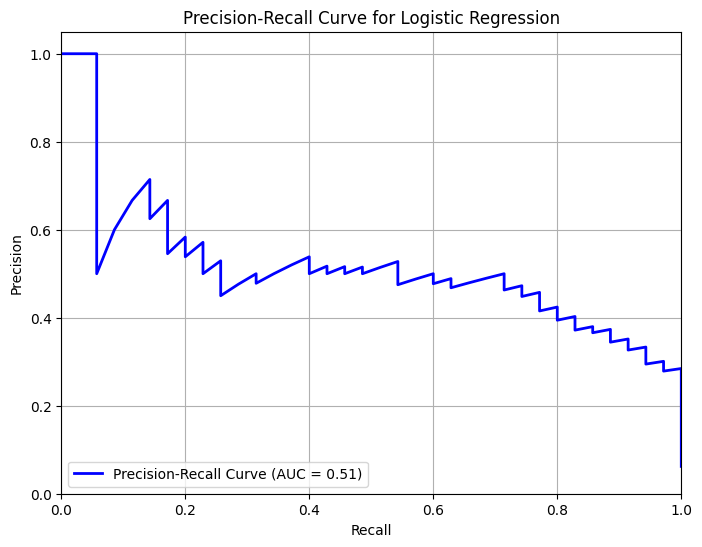

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, y_train)

# Dự đoán xác suất của lớp positive từ mô hình Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Tính precision, recall và ngưỡng (thresholds) cho mô hình Logistic Regression
precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(y_test, y_prob_logistic)

# Tính diện tích dưới đường cong Precision-Recall (AUC) cho mô hình Logistic Regression
pr_auc_logistic = auc(recall_logistic, precision_logistic)

print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("Thresholds:", thresholds_logistic)
# Vẽ Precision-Recall curve cho mô hình Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(recall_logistic, precision_logistic, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc_logistic:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

### AUC chỉ đạt 0,51

Cho thấy mô hình này chỉ hơi tốt so với một mô hình ngẫu nhiên


# SỬ DỤNG MÔ HÌNH SVM

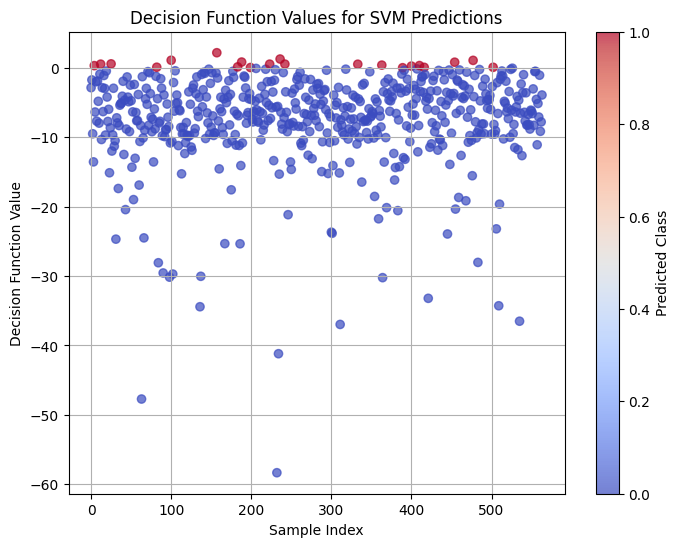

In [16]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear', probability=True, random_state=1)
svm_model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Lấy ra các giá trị dự đoán từ hàm decision_function của SVM
decision_values_svm = svm_model.decision_function(X_test)

# Vẽ biểu đồ scatter plot cho SVM
plt.figure(figsize=(8, 6))
plt.scatter(range(len(decision_values_svm)), decision_values_svm, c=y_pred_svm, cmap='coolwarm', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Decision Function Value')
plt.title('Decision Function Values for SVM Predictions')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

## Ta quan sát thấy khoảng 30 điểm positive
Tức là hành vi gian lận
Với mô hình này độ chính xác khá cao, khi chỉ có một số ít điểm nằm rời rạt

# SỬ DỤNG MÔ HÌNH NEURAL NETWORKS

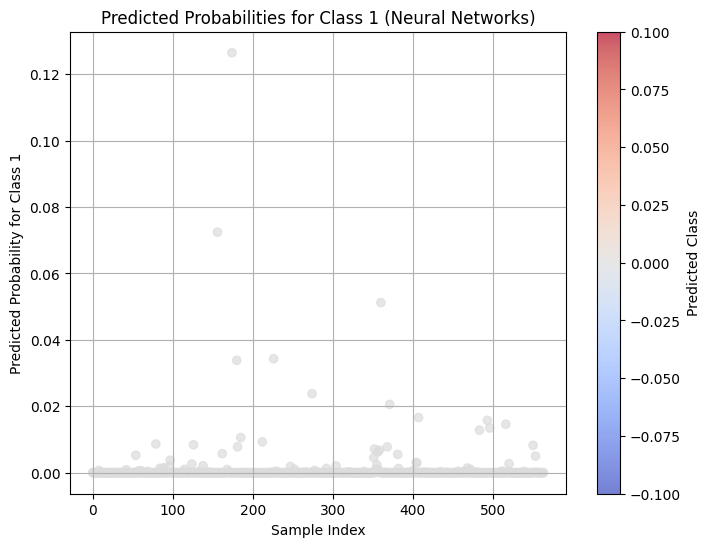

In [17]:
from sklearn.neural_network import MLPClassifier

# Huấn luyện mô hình Neural Networks
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1)
nn_model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred_nn = nn_model.predict(X_test)

# Lấy ra các giá trị dự đoán từ hàm predict_proba của Neural Networks
predicted_probabilities_nn = nn_model.predict_proba(X_test)

# Vẽ biểu đồ scatter plot cho Neural Networks
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predicted_probabilities_nn)), predicted_probabilities_nn[:, 1], c=y_pred_nn, cmap='coolwarm', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability for Class 1')
plt.title('Predicted Probabilities for Class 1 (Neural Networks)')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()


## Mô hình này rất tốt, độ chính xác khá cao

# II. Chạy mô hình với tập test (phase2)